In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import doctest
import copy

In [4]:
#https://stackoverflow.com/questions/40137950/possible-to-run-python-doctest-on-a-jupyter-cell-function
def test(func):
    '''
    Use test as a decorator to a function with doctests in Jupyter notebook. 
    Run the cell to see the results of the doctests.
    '''
    globs = copy.copy(globals())
    globs.update({func.__name__:func})
    doctest.run_docstring_examples(func, globs, verbose=True, name=func.__name__)
    return func

### Simulate straight line and circular movements with Unicycle model

Robot is at the origin (0, 0) and facing North, i.e, $\theta = \pi/2$

Use the Kinematics equations we had developed in class for the Unicycle model

In [5]:
#uncomment this decorator to test your code
@test 
def unicycle_model(curr_pose, v, w, dt=1.0):
    '''
    >>> unicycle_model((0.0,0.0,0.0), 1.0, 0.0)
    (1.0, 0.0, 0.0)
    >>> unicycle_model((0.0,0.0,0.0), 0.0, 1.0)
    (0.0, 0.0, 1.0)
    >>> unicycle_model((0.0, 0.0, 0.0), 1.0, 1.0)
    (1.0, 0.0, 1.0)
    '''
    ## write code to calculate next_pose
    # refer to the kinematic equations of a unicycle model
    # x = 
    # y = 
    # theta = 
    x = curr_pose[0] + v*np.cos(curr_pose[2])*dt
    y = curr_pose[1] + v*np.sin(curr_pose[2])*dt
    theta = curr_pose[2] + w*dt
    
    # Keep theta bounded between [-pi, pi]
    theta = np.arctan2(np.sin(theta), np.cos(theta))
    # return calculated (x, y, theta)
    return (x,y,theta)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/doctest.py", line 1487, in run
    sys.settrace(save_trace)



Finding tests in unicycle_model
Trying:
    unicycle_model((0.0,0.0,0.0), 1.0, 0.0)
Expecting:
    (1.0, 0.0, 0.0)
ok
Trying:
    unicycle_model((0.0,0.0,0.0), 0.0, 1.0)
Expecting:
    (0.0, 0.0, 1.0)
ok
Trying:
    unicycle_model((0.0, 0.0, 0.0), 1.0, 1.0)
Expecting:
    (1.0, 0.0, 1.0)
ok


Now let us try to simulate motion along a straight line and circle

Look at the kinematics equations you wrote - what should $v,\omega$ if
+ There is no change in $\theta$
+ $\theta$ has to change from 0 to 360 degrees

In [6]:
#straight line
straight_trajectory = []
pose = (0, 0, np.pi/2)
steps = 10
#fill in v and omega values
#v = 
v = np.ones(steps)
#w = 
w = np.zeros(steps)

for _ in range(steps):
     #instruction to take v, w and compute new pose
    straight_trajectory.append(pose)
    pose = unicycle_model(pose, v[_], w[_]) 
   # store new pose
straight_trajectory = np.array(straight_trajectory)   
    

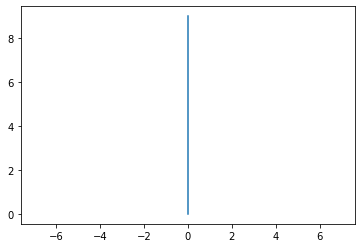

In [ ]:
### Plot straight and circular trajectories
plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(straight_trajectory[:,0],straight_trajectory[:,1])


In [ ]:
#circle
circle_trajectory = []
pose = (0, 0, np.pi/2)
steps = 100
#fill in v and omega values
#v = 
v = 0.01*np.ones(steps)
#w = 
w = np.ones(steps)
for _ in range(steps):
    #instruction to take v, w and compute new pose    
    circle_trajectory.append(pose)
    pose = unicycle_model(pose, v[_], w[_],0.1) 
   # store new pose
circle_trajectory = np.array(circle_trajectory)   
    
   
   


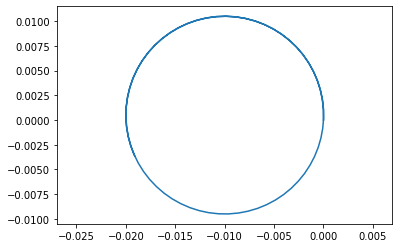

In [ ]:
### Plot straight and circular trajectories
plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(circle_trajectory[:,0],circle_trajectory[:,1])


### Simulate Unicycle model with Open Loop control

We want the robot to follow these instructions

**straight 10m, right turn, straight 5m, left turn, straight 8m, right turn**

It is in open loop; control commands have to be calculated upfront. How do we do it?

To keep things simple in the first iteration, we can fix $v = v_c$ and change only $\omega$. To make it even simpler, $\omega$ can take only 2 values 
+ 0 when the vehicle is going straight 
+ $\omega = \omega_c$ when turning

This leaves only 2 questions to be answered
* What should be $v_c$ and $\omega_c$?
* When should $\omega$ change from 0 and back?

In [ ]:
v_c = 1 # m/s
w_c = np.pi/6 # rad/s


#calculate time taken to finish a quarter turn (pi/2)
t_turn = 3 

#calculate the time taken to finish straight segments
# omega array is to be padded with equivalent zeros

#t_straight1, t_straight_2, t_straight3 = 
t_straight_1, t_straight_2, t_straight_3 = 10,5,8

all_w = [0]*t_straight_1 + [w_c]*t_turn + \
        [0]*t_straight_2 + [w_c]*t_turn + \
        [0]*t_straight_3 + [-w_c]*t_turn
all_v = v_c*np.ones_like(all_w)

print(all_w)
print(all_v)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0, 0, 0, 0, 0, 0.5235987755982988, 0.5235987755982988, 0.5235987755982988, 0, 0, 0, 0, 0, 0, 0, 0, -0.5235987755982988, -0.5235987755982988, -0.5235987755982988]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


Let us make a cool function out of this!

Take in as input a generic route and convert it into open-loop commands

Input format: [("straight", 5), ("right", 90), ("straight", 6), ("left", 85)]

Output: all_v, all_w

In [7]:
#route input format [("straight", 5), ("right", 90), ("straight", 6), ("left", 85)]
def get_open_loop_commands(route, v_c, w_c):
    t_turn = int(np.pi/2/w_c) #seconds
    all_w = []
  #calculate time taken to finish a quarter turn (pi/2)
    for segment in route:
        if segment[0] == "straight":
            all_w += [0.0]*int(segment[1]/v_c)
        elif segment[0] == "right":
            all_w += [-w_c]*int(np.deg2rad(segment[1])/w_c)
        else:
            all_w += [w_c]*int(np.deg2rad(segment[1])/w_c)
    all_v = v_c*np.ones_like(all_w)
  #calculate the time taken to finish straight segments
  # omega array is to be padded with equivalent zeros
    return all_v, all_w

In [ ]:
#route input format [("straight", 5), ("right", 90), ("straight", 6), ("left", 85)]
# using dictionaries
def get_open_loop_commands2(route, v_c, w_c):
    t_turn = int(np.pi/2/w_c) #seconds
    all_w = []
    omegas = {"straight":0, "left": w_c, "right":-w_c}
  #calculate time taken to finish a quarter turn (pi/2)
    for manoeuvre,command in route:
        u = np.ceil(command/v_c).astype('int')
        v = np.ceil(np.deg2rad(command)/w_c).astype('int')
        t_cmd = u if manoeuvre == 'straight' else v
        all_w += [omegas[manoeuvre]]*t_cmd
    all_v = v_c*np.ones_like(all_w)
  #calculate the time taken to finish straight segments
  # omega array is to be padded with equivalent zeros
    return all_v, all_w

### Unit test your function with the following inputs

+ [("straight", 5), ("right", 90), ("straight", 6), ("left", 85)]
+ $v_c = 1$
+ $w_c = \pi/12$

In [ ]:
get_open_loop_commands([("straight", 5), ("right", 90), ("straight", 6), ("left", 85)],1,np.pi/12)

 

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.]),
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.2617993877991494,
  -0.2617993877991494,
  -0.2617993877991494,
  -0.2617993877991494,
  -0.2617993877991494,
  -0.2617993877991494,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.2617993877991494,
  0.2617993877991494,
  0.2617993877991494,
  0.2617993877991494,
  0.2617993877991494])

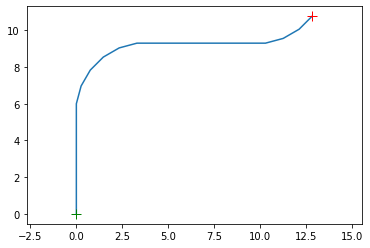

In [10]:
robot_trajectory = []
pose = np.array([0, 0, np.pi/2])
all_v, all_w = get_open_loop_commands([("straight", 5), ("right", 90), ("straight", 6), ("left", 85)],1,np.pi/12)
#print(all_w)
#print(all_v)
for v, w in zip(all_v, all_w):
    #instruction to take v, w and compute new pose
    robot_trajectory.append(pose) 
    pose = unicycle_model(pose,v,w,1.0)   
   # store new pose
robot_trajectory = np.array(robot_trajectory)   

plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(robot_trajectory[:,0],robot_trajectory[:,1])
#show first and last robot positions with + markers
xi,yi, _ = robot_trajectory[0]
xf,yf, _ = robot_trajectory[-1]
plt.plot(xi, yi, 'g+', ms=10)
plt.plot(xf, yf, 'r+', ms=10)

<IPython.core.display.Javascript object>


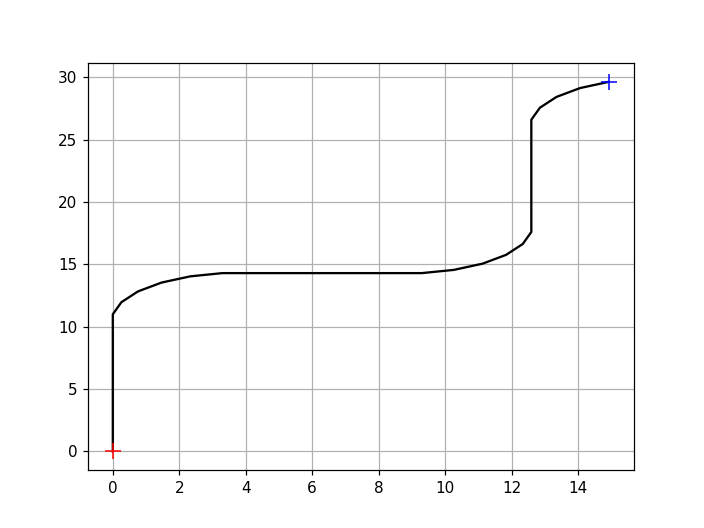

In [ ]:
# plot robot trajectory
plt.figure()
plt.grid()
#plt.plot( )

#show first and last robot positions with + markers
# example: plt.plot(0, 0, 'r+', ms=10)


### Improved capabilities!

+ Slow the robot while turning ($v_c$ for turn and straight needed)

+ How to accommodate a sampling time < 1.0s (hint: think of sampling instances instead of time)

In [11]:
#route input format [("straight", 5), ("right", 90), ("straight", 6), ("left", 85)]
# improved
def get_open_loop_commands3(route, v_slow, v_c, w_c):
    t_turn = int(np.pi/2/w_c) #seconds
    all_w = []
    omegas = {"straight":0, "left": w_c, "right":-w_c}
  #calculate time taken to finish a quarter turn (pi/2)
    for manoeuvre,command in route:
        u = np.ceil(command/v_c).astype('int')
        v = np.ceil(np.deg2rad(command)/w_c).astype('int')
        t_cmd = u if manoeuvre == 'straight' else v
        all_w += [omegas[manoeuvre]]*t_cmd
    all_v = v_c*np.ones_like(all_w)
    for i in range(len(all_w)):
      if not all_w[i] == 0:
        all_v[i] = v_slow  

  #calculate the time taken to finish straight segments
  # omega array is to be padded with equivalent zeros
    return all_v, all_w

In [12]:
get_open_loop_commands3([("straight", 5), ("right", 90), ("straight", 6), ("left", 85)],0.5,1,np.pi/12)

(array([1. , 1. , 1. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 1. ,
        1. , 1. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 [0,
  0,
  0,
  0,
  0,
  -0.2617993877991494,
  -0.2617993877991494,
  -0.2617993877991494,
  -0.2617993877991494,
  -0.2617993877991494,
  -0.2617993877991494,
  0,
  0,
  0,
  0,
  0,
  0,
  0.2617993877991494,
  0.2617993877991494,
  0.2617993877991494,
  0.2617993877991494,
  0.2617993877991494,
  0.2617993877991494])